# XGBoost with Boston Dataset
  
  
  
  
  
  
#### Jeevan Kumar Ramakrishna

## Import Code

In [337]:
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# sns.set_context("paper")

from pdpbox import info_plots, get_dataset
from pdpbox import pdp
import xgboost as xgb
import sklearn.metrics as sk_met
import sklearn.model_selection as sk_mod

sns.set(style="ticks", color_codes=True)
# sns.set_context('talk')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format


In [335]:


from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



## Load Boston dataset

In [117]:
boston = sk_data.load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [286]:
import pandas as pd

data = pd.DataFrame(boston['data'])
data.columns = boston.feature_names
data['target'] = boston['target']
display(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [287]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


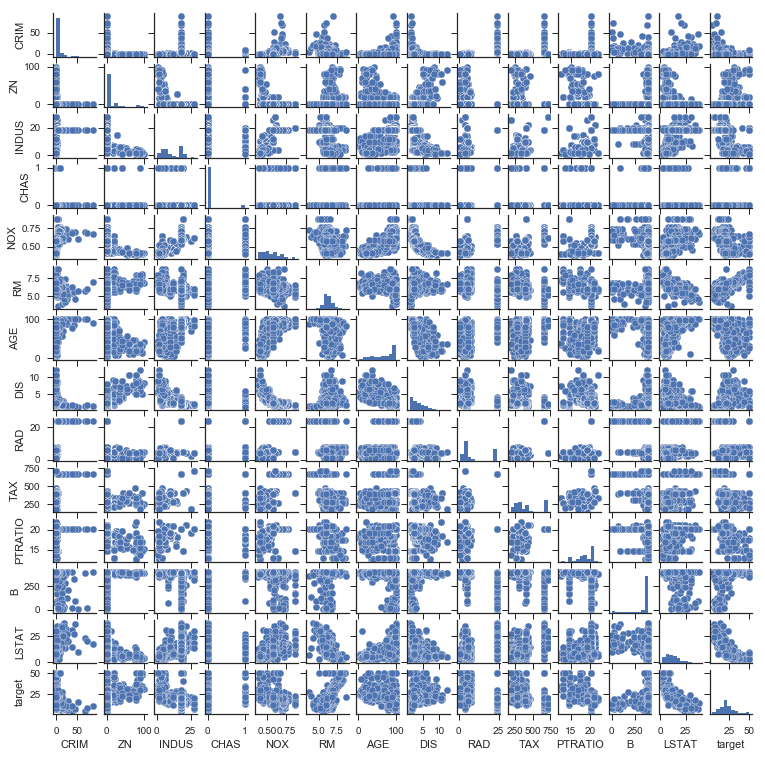

In [338]:
g = sns.pairplot(data)
plt.gcf().set_size_inches(10,10)

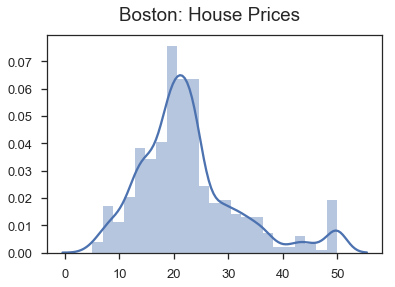

In [123]:
sns.distplot(boston['target'])
t = plt.gcf().suptitle('Boston: House Prices')

## Modelling

### Datasetup

In [125]:
train, test = sk_mod.train_test_split(data, train_size=0.8, random_state=0)

In [126]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1:]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


### XGBoost Initial Fit

In [292]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, 
                          learning_rate=0.1, max_depth=5,
                         alpha=10, n_estimators=10)

In [296]:
xg_reg.fit(X_train, y_train)
y_preds = xg_reg.predict(X_test)
print('Mean Squared Error: {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Mean Squared Error: 109.6910


### XGBoost GridSearch Fit

In [275]:
param_grid = {
    'objective':['reg:linear'],
    'n_estimators': [10, 100, 200],
    'max_depth': [5, 10, 15],
    'colsample_bytree': [0.1, 0.3, 0.5, 1.0],
    'colsample_bylevel': [0.1, 0.3, 0.5, 1.0],
    'learning_rate':[0.01, 0.05, 0.1],
    'subsample':[0.1,0.5, 0.75,1.0],
    'reg_lambda':[0]
}
gs_cv = sk_mod.GridSearchCV(cv=5, 
                            estimator=xg_reg, 
                            n_jobs=5, verbose=1, 
                            scoring=sk_met.make_scorer(sk_met.mean_squared_error, greater_is_better=False),
                            param_grid=param_grid)
gs_cv.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done 4413 tasks      | elapsed:   28.3s
[Parallel(n_jobs=5)]: Done 5920 tasks      | elapsed:   39.4s
[Parallel(n_jobs=5)]: Done 8020 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 8640 out of 8640 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['reg:linear'], 'n_estimators': [10, 100, 200], 'max_depth': [5, 10, 15], 'colsample_bytree': [0.1, 0.3, 0.5, 1.0], 'colsample_bylevel': [0.1, 0.3, 0.5, 1.0], 'learning_rate': [0.01, 0.05, 0.1], 'subsample': [0.1, 0.5, 0.75, 1.0], 'reg_lambda': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [276]:
gs_cv.best_estimator_

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
       colsample_bylevel=0.5, colsample_bytree=1.0, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=0, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [277]:
pd.DataFrame(gs_cv.cv_results_).sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_objective,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1233,0.072352,0.001422,0.001902,0.000042,0.5,1,0.05,5,200,reg:linear,0,0.5,"{'colsample_bylevel': 0.5, 'colsample_bytree':...",-6.200201,-7.342052,-6.538879,-12.666641,-6.410744,-7.835221,2.450217,1,-2.508344e-01,-2.557356e-01,-2.649077e-01,-2.640925e-01,-2.874047e-01,-2.645950e-01,1.255767e-02
1229,0.036947,0.001171,0.001478,0.000130,0.5,1,0.05,5,100,reg:linear,0,0.5,"{'colsample_bylevel': 0.5, 'colsample_bytree':...",-6.435454,-7.349209,-6.718688,-13.687652,-6.736199,-8.189028,2.769709,2,-8.978489e-01,-1.014886e+00,-9.955434e-01,-9.811666e-01,-1.028537e+00,-9.835963e-01,4.582564e-02
813,0.087654,0.001592,0.003164,0.000032,0.3,1,0.05,10,200,reg:linear,0,0.5,"{'colsample_bylevel': 0.3, 'colsample_bytree':...",-6.733359,-7.428506,-7.482481,-13.623505,-6.541157,-8.366308,2.658668,3,-8.248800e-03,-8.485641e-03,-7.954120e-03,-8.850803e-03,-8.220950e-03,-8.352063e-03,3.009312e-04
850,0.089491,0.002898,0.003149,0.000128,0.3,1,0.1,10,200,reg:linear,0,0.75,"{'colsample_bylevel': 0.3, 'colsample_bytree':...",-7.352439,-8.229364,-7.597241,-12.041710,-7.039928,-8.455632,1.837726,4,-5.218300e-07,-6.086730e-07,-5.449244e-07,-5.132503e-07,-4.553743e-07,-5.288104e-07,4.964149e-08
846,0.047241,0.000245,0.002035,0.000017,0.3,1,0.1,10,100,reg:linear,0,0.75,"{'colsample_bylevel': 0.3, 'colsample_bytree':...",-7.355649,-8.231340,-7.598065,-12.045371,-7.043143,-8.458208,1.838156,5,-2.169796e-04,-2.590113e-04,-2.373861e-04,-2.252338e-04,-1.850943e-04,-2.247410e-04,2.435855e-05


In [299]:
y_preds = gs_cv.best_estimator_.predict(X_test)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Mean Squared Error 22.4238


Text(0.5,0.98,'XGBoost Feature Importance')

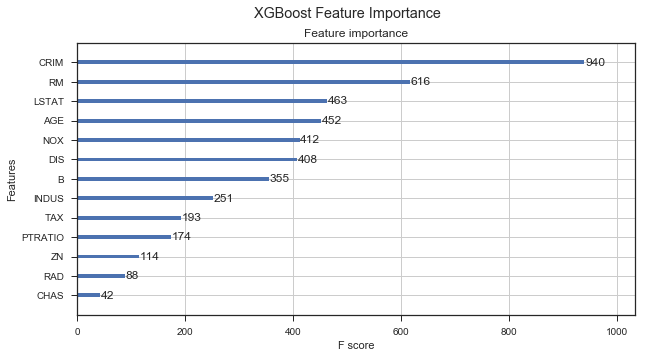

In [301]:
xgb.plot_importance(gs_cv.best_estimator_)
plt.gcf().set_size_inches(10, 5)
plt.gcf().suptitle('XGBoost Feature Importance')

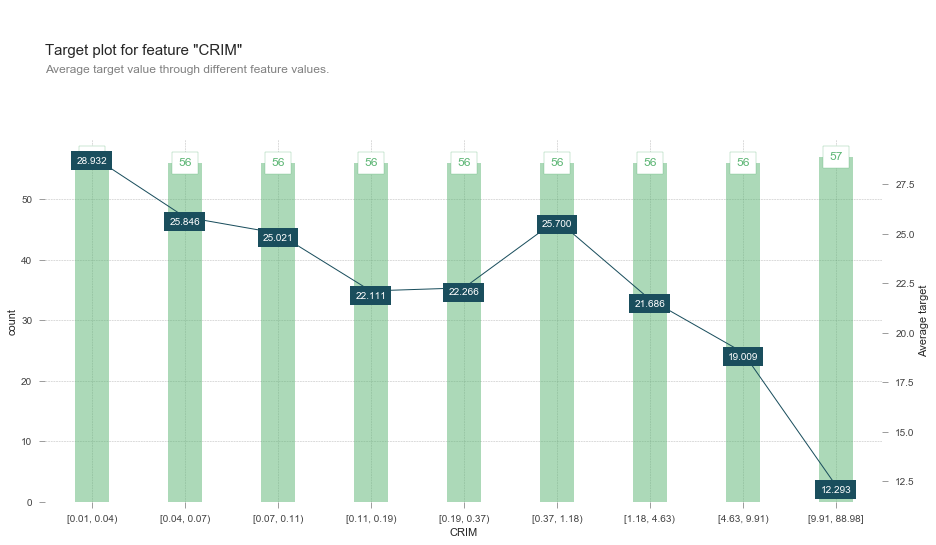

In [303]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='CRIM', feature_name='CRIM', target='target')


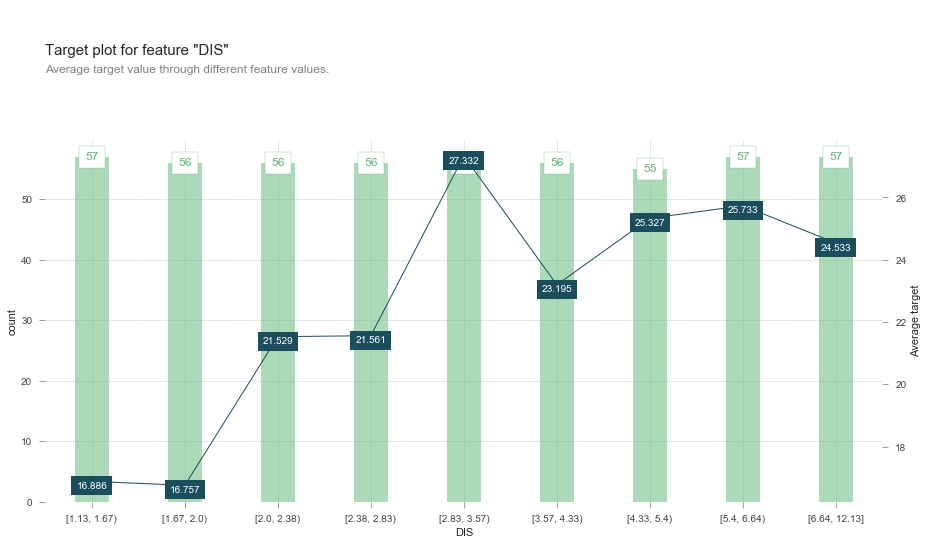

In [304]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='DIS', feature_name='DIS', target='target')


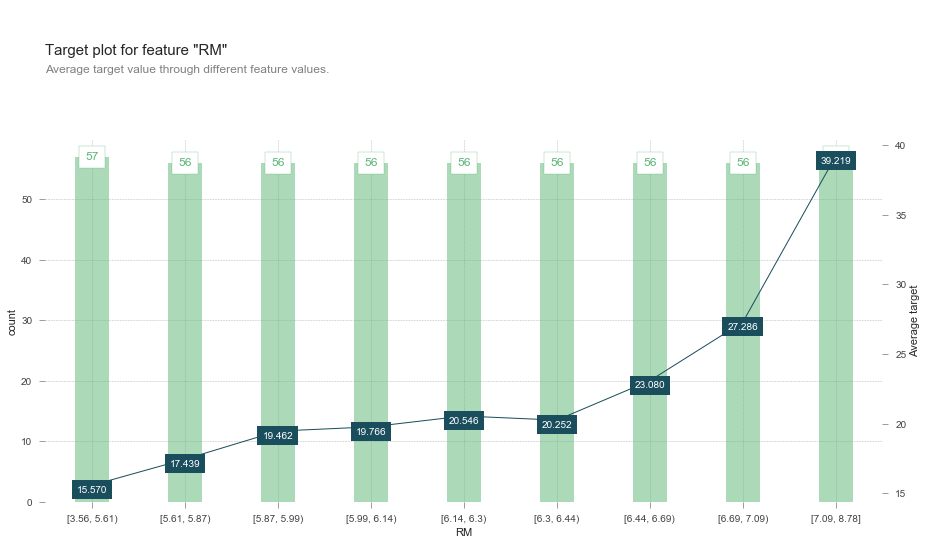

In [305]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='RM', feature_name='RM', target='target')


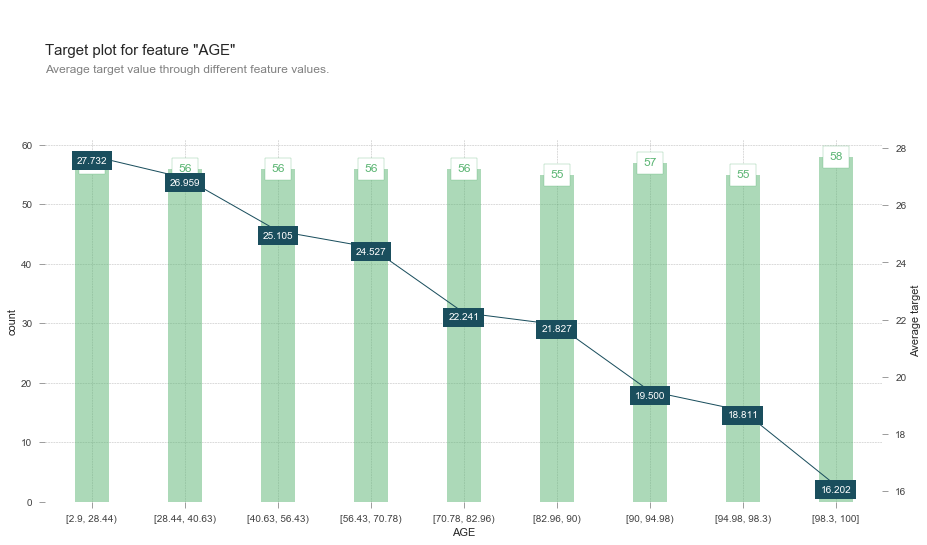

In [306]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='AGE', feature_name='AGE', target='target')


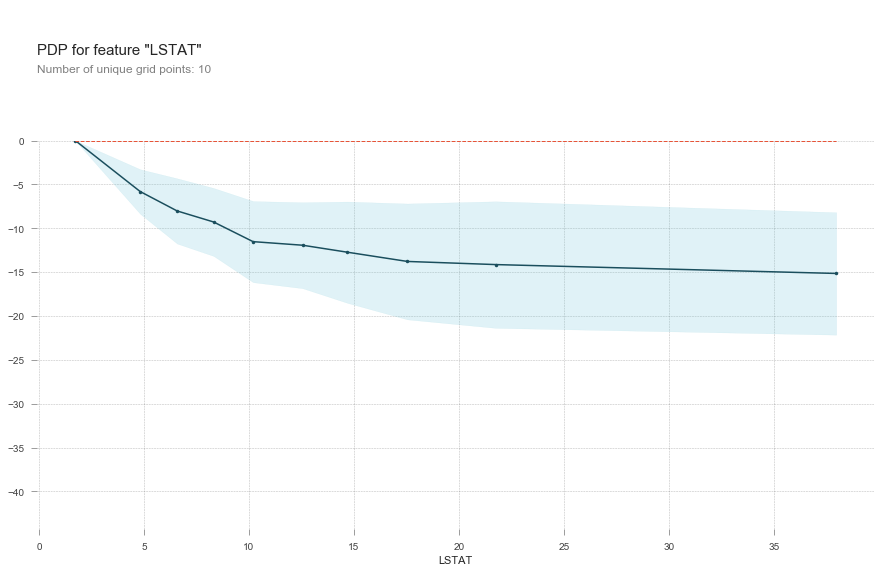

In [314]:
pdp_bmi = pdp.pdp_isolate(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          feature='LSTAT', predict_kwds={})
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_bmi, feature_name='LSTAT')


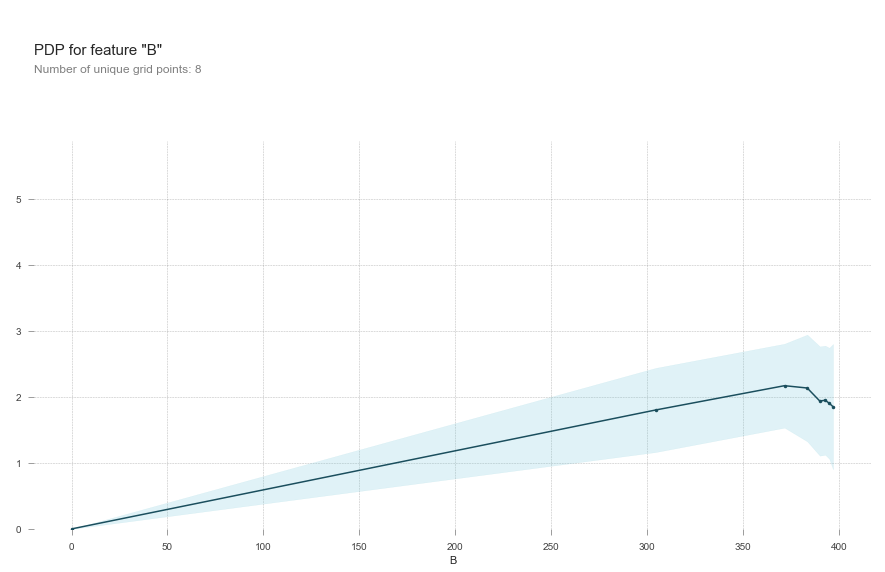

In [315]:
pdp_bmi = pdp.pdp_isolate(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          feature='B', predict_kwds={})
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_bmi, feature_name='B')


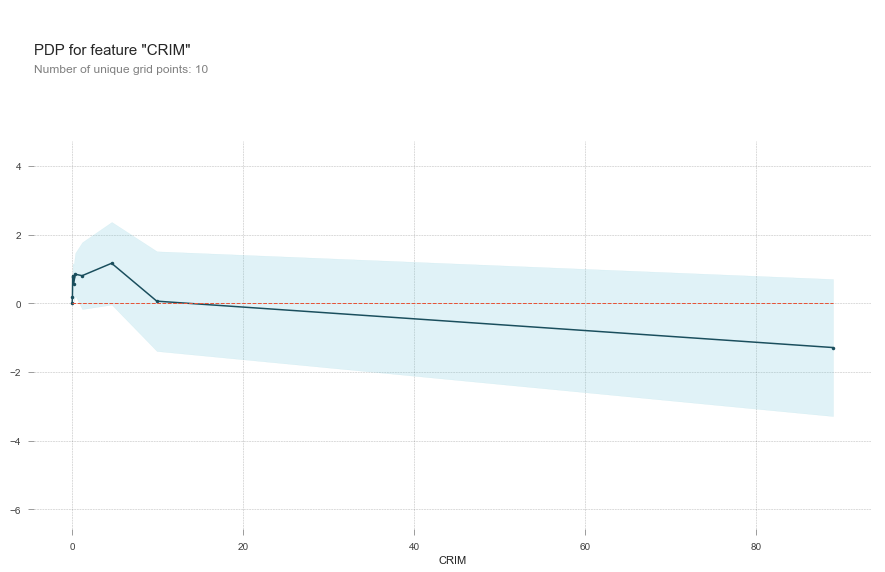

In [312]:
pdp_bmi = pdp.pdp_isolate(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          feature='CRIM', predict_kwds={})
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_bmi, feature_name='CRIM')


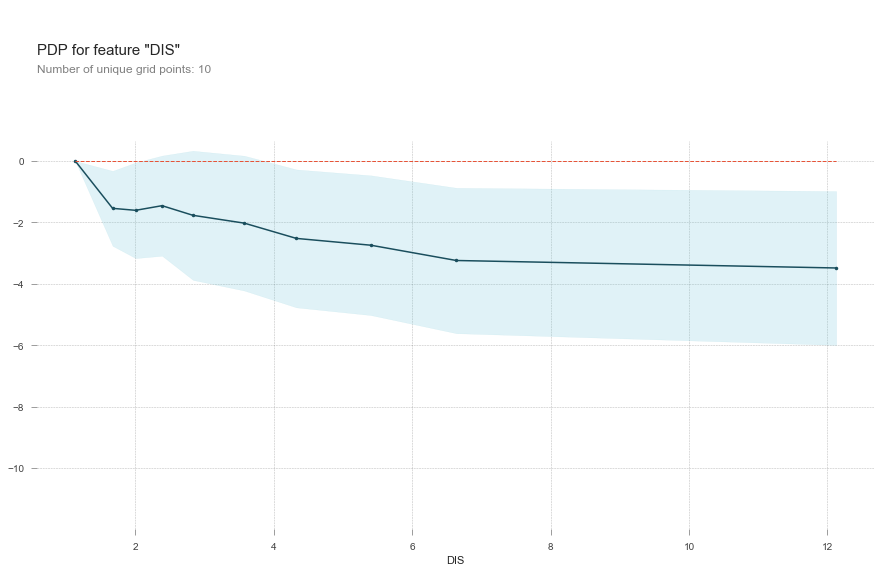

In [313]:
pdp_bmi = pdp.pdp_isolate(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          feature='DIS')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_bmi, feature_name='DIS')


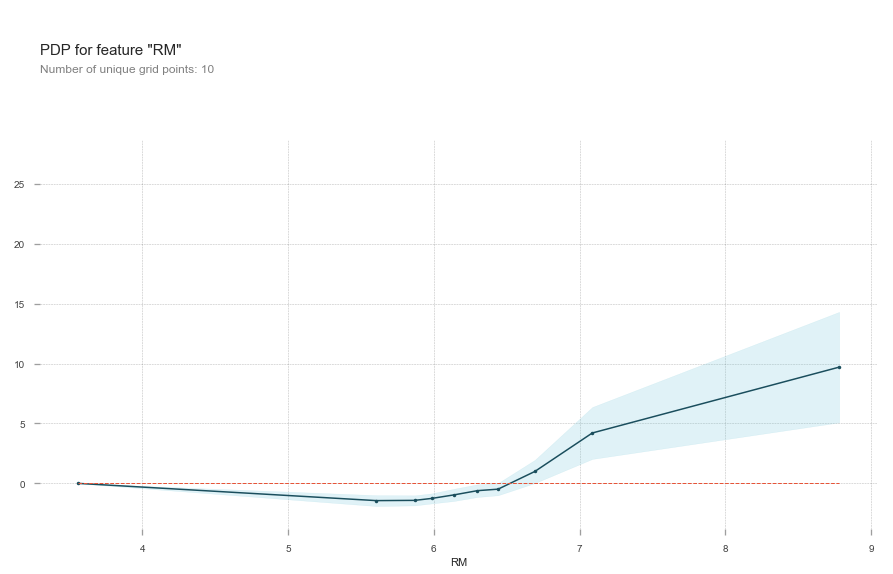

In [144]:
pdp_bmi = pdp.pdp_isolate(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          feature='RM')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_bmi, feature_name='RM')


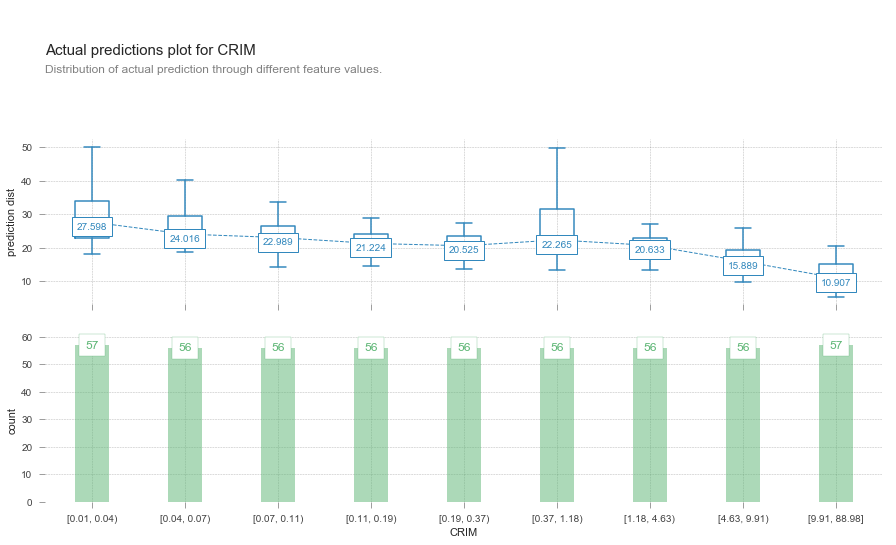

In [316]:
fig, axes, summary_df = info_plots.actual_plot(
    model=gs_cv.best_estimator_, X=data[data.columns[:-1]],
    feature='CRIM', feature_name='CRIM', predict_kwds={})

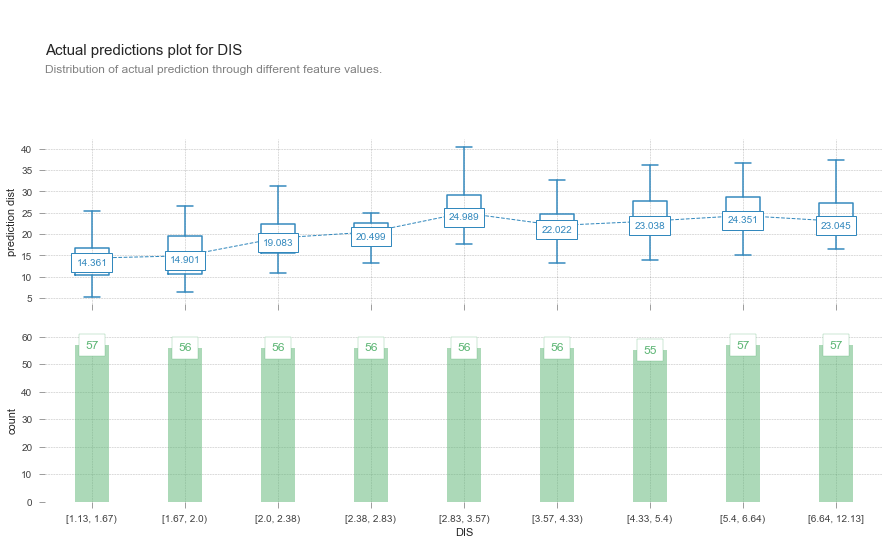

In [317]:
fig, axes, summary_df = info_plots.actual_plot(
    model=gs_cv.best_estimator_, X=data[data.columns[:-1]],
    feature='DIS', feature_name='DIS', predict_kwds={})

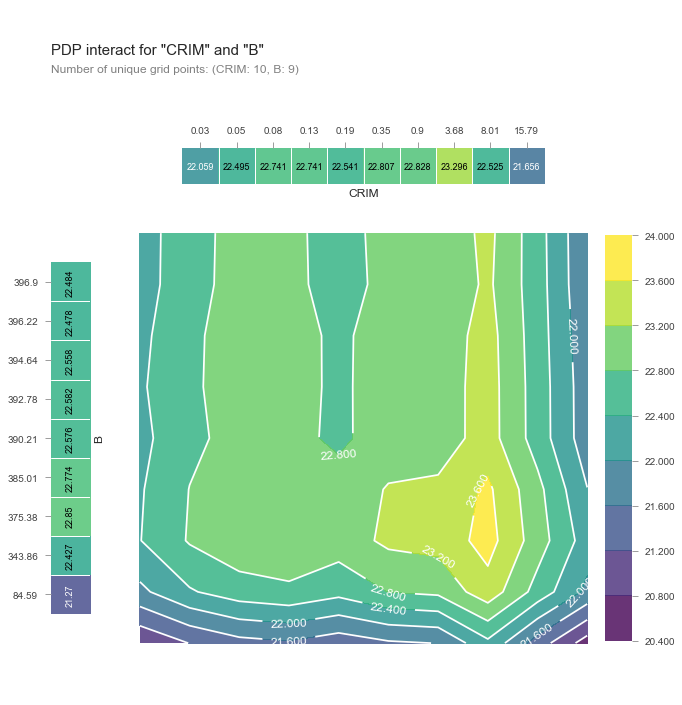

In [318]:


inter1 = pdp.pdp_interact(model=gs_cv.best_estimator_,
                          dataset=data,
                          model_features=data.columns[:-1],
                          features=['CRIM', 'B', 'LSTAT'],
                          num_grid_points=[10, 10, 10],
                          percentile_ranges=[(5, 95), (5, 95), (5, 95)])
fig, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1,
                                  feature_names=['CRIM', 'B', 'LSTAT'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True)


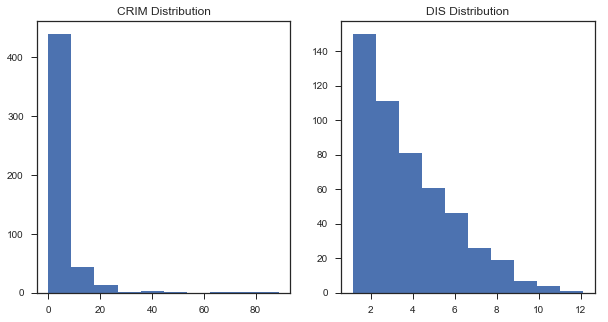

In [322]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(data['CRIM'])
ax[0].set_title('CRIM Distribution')
_ = ax[1].hist(data['DIS'])
ax[1].set_title('DIS Distribution')
fig.set_size_inches(10, 5)

### Sklearn Gradient Boosted Tree Fit

In [323]:
params = {
    'learning_rate': 0.1,
    'loss':'ls',
    'n_estimators':200,
    'subsample':1.0,
    'criterion':'friedman_mse',
    'max_depth':5,
    'random_state':0
    
}
gb_regr = sk_ens.GradientBoostingRegressor(**params)

In [326]:
gb_regr.fit(X=X_train, y=y_train)
y_preds = gb_regr.predict(X_test)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Mean Squared Error 17.3264


### Sklearn Gradient Boosted Tree Grid Search based Fit

In [328]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.025, 0.05, 0.1, 0.15],
    'subsample': [1.0]
}
gs_cv_sk_reg = sk_mod.GridSearchCV(cv=5, 
                            estimator=gb_regr, 
                            n_jobs=5, verbose=1, 
                            scoring=sk_met.make_scorer(sk_met.mean_squared_error, greater_is_better=False),
                            param_grid=param_grid)
gs_cv_sk_reg.fit(X=X_train, y=y_train)
gs_cv_sk_reg.best_estimator_.fit(X=X_train, y=y_train)
y_preds = gs_cv_sk_reg.best_estimator_.predict(X_test)
print('Mean Squared Error {0:.4f}'.format(sk_met.mean_squared_error(y_test, y_preds)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Mean Squared Error 16.9598


[Parallel(n_jobs=5)]: Done 240 out of 240 | elapsed:    5.1s finished


In [231]:
gs_cv_sk_reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

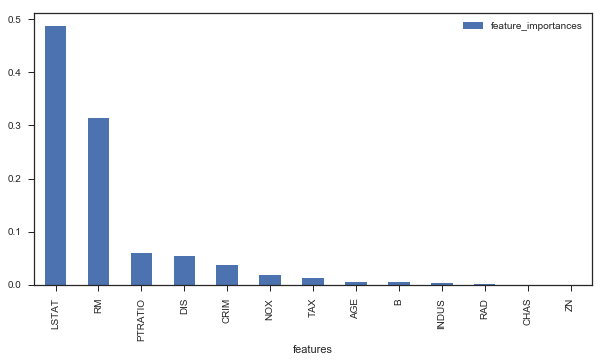

In [334]:
model = gs_cv_sk_reg.best_estimator_
fig, ax = plt.subplots(1, 1)
plot_df = pd.DataFrame({'feature_importances':model.feature_importances_, 'features':data.columns[:-1] })
plot_df = plot_df.set_index('features')
plot_df.sort_values(by=['feature_importances'], ascending=False, inplace=True)
plot_df.plot(kind='bar', ax=ax)
fig.set_size_inches(10,5)


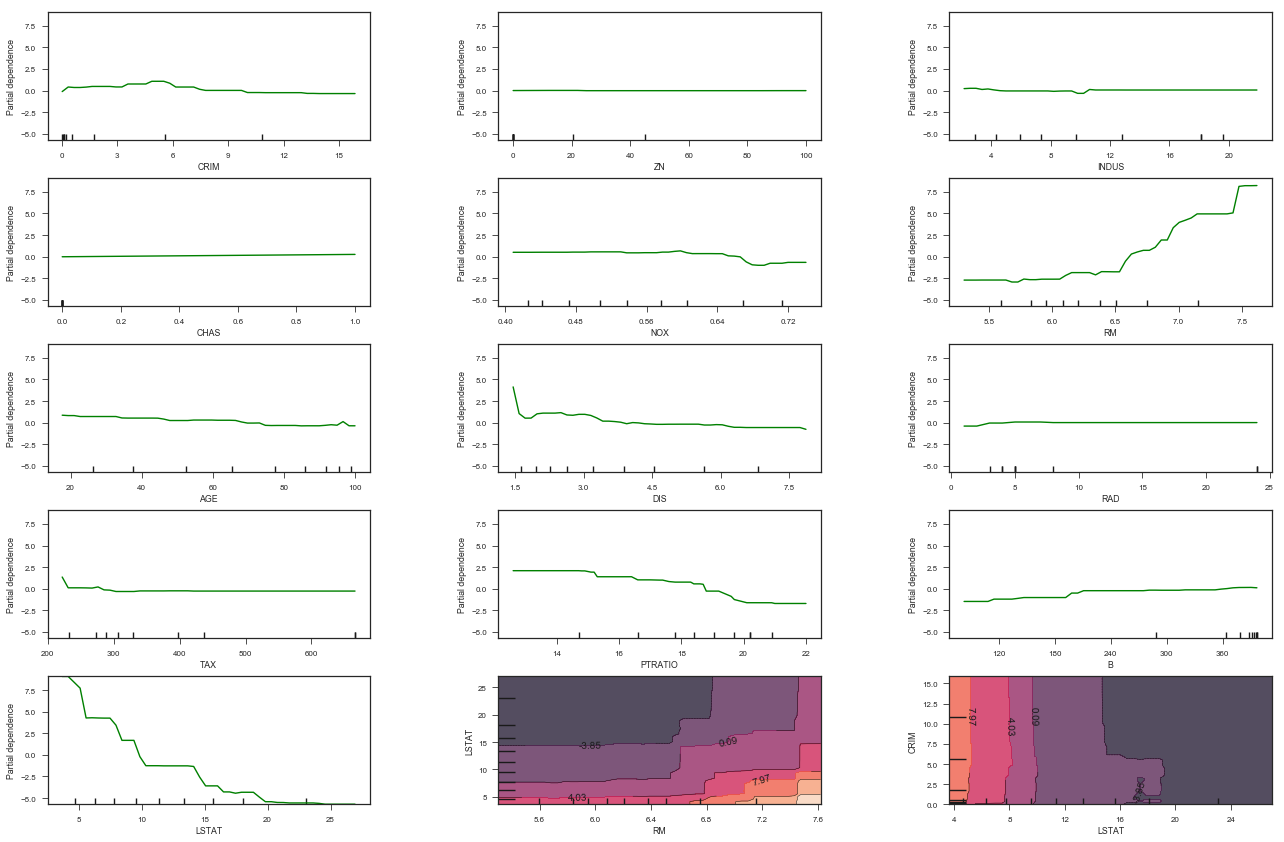

In [235]:
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, (5, 12), (12,0)]
fig, axs = sk_ens.partial_dependence.plot_partial_dependence(model, data[data.columns[:-1]].values, 
                                   features,
                                   feature_names=data.columns[:-1],
                                   n_jobs=3, grid_resolution=50)
fig.set_size_inches(20, 20)

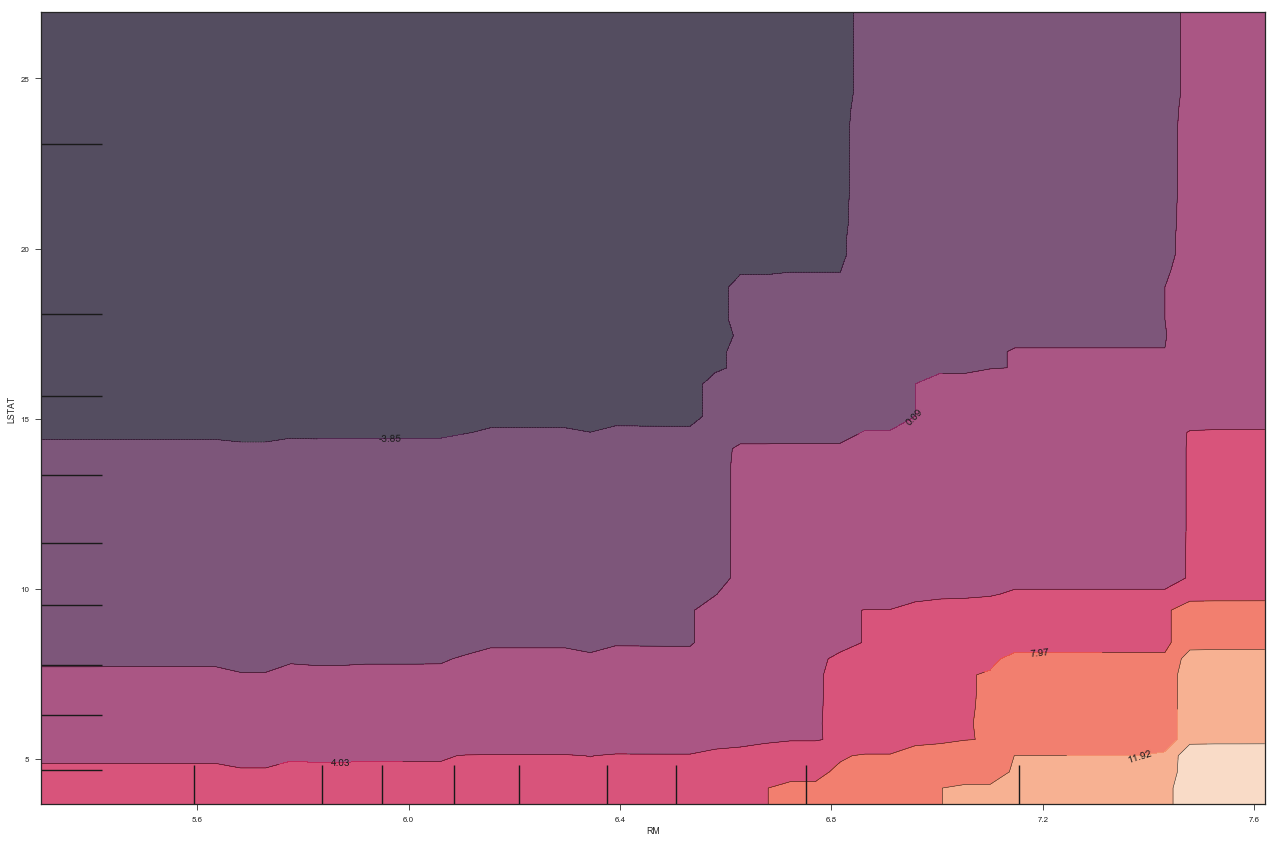

In [257]:
features = [(5, 12)]
fig, axs = sk_ens.partial_dependence.plot_partial_dependence(model, data[data.columns[:-1]].values, 
                                   features,
                                   feature_names=data.columns[:-1],
                                   n_jobs=3, grid_resolution=50)
fig.set_size_inches(20, 20)

In [188]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

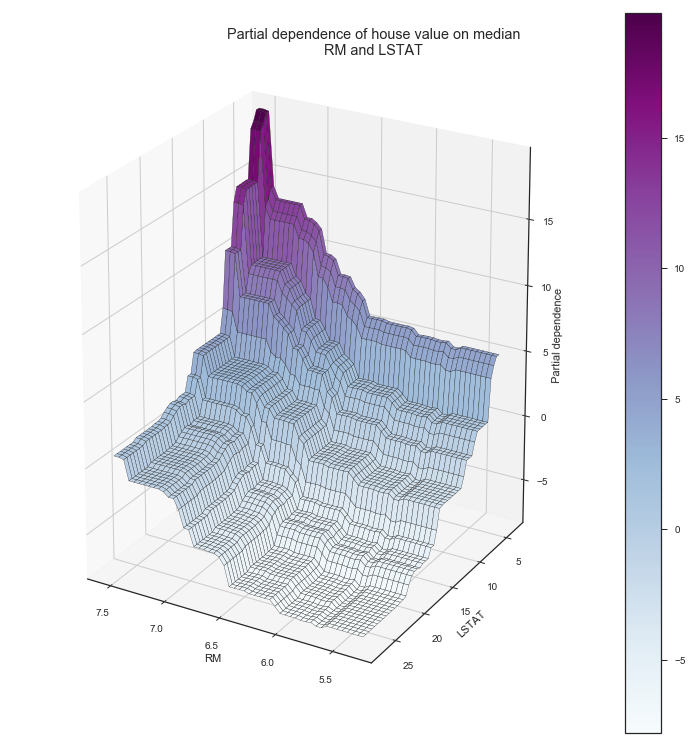

In [333]:
fig = plt.figure()

target_feature = (5, 12)
names = data.columns
pdp, axes = sk_ens.partial_dependence.partial_dependence(model, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=20, azim=120)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             '{0} and {1}'.format(names[target_feature[0]], names[target_feature[1]]))
plt.subplots_adjust(top=0.9)
plt.gcf().set_size_inches(10, 10)